In [1]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
def dedup(arr):
    result = []
    for value in arr: 
        if value not in result: 
            result.append(value)
    return result

In [3]:
ds = pd.read_csv('data/0923.csv', encoding='utf8')
ds

,seqStamp,"('Resistance', 1)","('Resistance', 2)","('Resistance', 3)","('Resistance', 4)","('Resistance', 5)","('Resistance', 6)","('Resistance', 7)","('Resistance', 8)","('Resistance', 9)",...,"('Resistance', 87)","('Resistance', 88)","('Resistance', 89)","('Resistance', 90)","('Resistance', 91)","('Resistance', 92)","('Resistance', 93)","('Resistance', 94)","('Resistance', 95)","('Resistance', 96)"
0,0,0.487,0.472,0.492,0.489,0.478,0.503,0.495,0.498,0.493,...,0.484,0.484,0.478,0.482,0.475,0.480,0.485,0.477,0.476,0.484
1,1,0.488,0.473,0.491,0.490,0.477,0.502,0.496,0.506,0.489,...,0.486,0.489,0.482,0.481,0.470,0.477,0.484,0.477,0.474,0.490
2,2,0.487,0.474,0.492,0.489,0.475,0.503,0.496,0.504,0.489,...,0.487,0.487,0.478,0.482,0.471,0.479,0.485,0.473,0.476,0.488
3,3,0.486,0.475,0.491,0.492,0.476,0.503,0.495,0.501,0.494,...,0.487,0.487,0.480,0.482,0.477,0.480,0.488,0.473,0.475,0.491
4,4,0.488,0.476,0.491,0.492,0.476,0.504,0.497,0.501,0.491,...,0.488,0.486,0.478,0.482,0.478,0.479,0.487,0.479,0.477,0.491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1496,0.583,0.646,0.628,0.621,0.633,0.575,0.557,0.645,0.594,...,0.711,0.872,0.686,0.688,0.777,0.469,0.519,0.510,0.502,0.383
1497,1497,0.581,0.645,0.627,0.621,0.635,0.576,0.558,0.646,0.596,...,0.714,0.870,0.681,0.683,0.742,0.469,0.518,0.509,0.501,0.381
1498,1498,0.581,0.648,0.627,0.623,0.635,0.576,0.558,0.647,0.597,...,0.715,0.867,0.685,0.684,0.751,0.470,0.514,0.507,0.498,0.376
1499,1499,0.587,0.640,0.622,0.622,0.641,0.576,0.558,0.647,0.597,...,0.715,0.867,0.685,0.684,0.751,0.470,0.514,0.507,0.498,0.376


In [4]:
len_ds = len(ds)
len_ds

1501

In [5]:
ds = ds.drop(['seqStamp'], axis = 1)
column = np.arange(96)
ds.columns = column

In [6]:
ds = ds.transpose()

In [7]:
label = np.arange(1,97,1)
label = label.tolist()
label = pd.DataFrame(label)
label.columns = ['CellNo']

In [8]:
ds = ds.iloc[:,200:]
ds = np.array(ds)
resist = pd.DataFrame(ds)
resist

,0,1,2,3,4,5,6,7,8,9,...,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300
0,0.549,0.549,0.549,0.549,0.549,0.549,0.549,0.549,0.549,0.549,...,0.583,0.583,0.584,0.583,0.582,0.583,0.581,0.581,0.587,0.587
1,0.598,0.598,0.598,0.598,0.598,0.598,0.598,0.598,0.598,0.598,...,0.644,0.645,0.647,0.647,0.648,0.646,0.645,0.648,0.640,0.642
2,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587,...,0.632,0.632,0.631,0.631,0.630,0.628,0.627,0.627,0.622,0.628
3,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587,0.587,...,0.625,0.627,0.626,0.625,0.624,0.621,0.621,0.623,0.622,0.620
4,0.594,0.594,0.594,0.594,0.594,0.594,0.594,0.594,0.594,0.594,...,0.635,0.635,0.636,0.634,0.633,0.633,0.635,0.635,0.641,0.631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.444,0.444,0.444,0.444,0.444,0.444,0.444,0.444,0.444,0.444,...,0.467,0.469,0.472,0.471,0.467,0.469,0.469,0.470,0.470,0.465
92,0.485,0.485,0.485,0.485,0.485,0.485,0.485,0.485,0.485,0.485,...,0.515,0.515,0.517,0.519,0.518,0.519,0.518,0.514,0.514,0.517
93,0.481,0.481,0.481,0.481,0.481,0.481,0.481,0.481,0.481,0.481,...,0.512,0.513,0.515,0.516,0.515,0.510,0.509,0.507,0.507,0.515
94,0.472,0.472,0.472,0.472,0.472,0.472,0.472,0.472,0.472,0.472,...,0.507,0.504,0.501,0.500,0.504,0.502,0.501,0.498,0.498,0.493


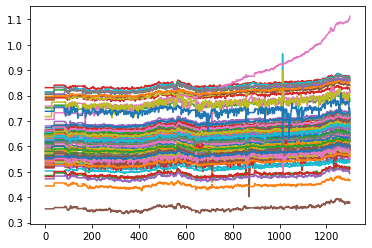

In [9]:
plt.plot(resist.transpose())
plt.show()

In [10]:
color_list = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2', 'rosybrown', 'olive','paleturquoise','mediumorchid', 'magenta','steelblue','plum','saddlebrown','peru','orange']

In [11]:
MAD_list_warn = []
MAD_list_fault = []
for i in range(len(resist)):
    median = np.median(resist.loc[i,:])
    MAD_list_warn.append(1.1*median)
    MAD_list_fault.append(1.25*median)

In [12]:
MAD_list_warn[9]

0.7183

In [13]:
div_len = 300
eps_set = 0.3
min_samples_set = 3
warn_offset = 1.11
fault_offset = 1.25

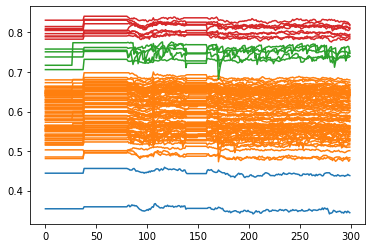

[[92, 96], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 63, 65, 66, 68, 69, 71, 72, 74, 75, 78, 80, 81, 83, 84, 86, 87, 89, 90, 93, 94, 95], [13, 67, 77, 79, 91], [54, 59, 64, 70, 73, 76, 82, 85, 88]]
CLUSTER CHANGE :  []
ERROR LIST :  []
WARN_LIST :  []


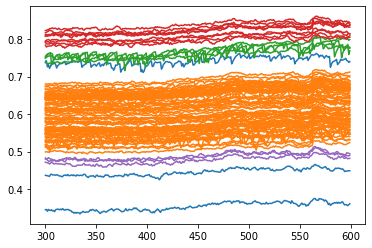

[[91, 92, 96], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 63, 65, 66, 68, 69, 71, 72, 74, 75, 78, 80, 81, 83, 84, 86, 87, 89, 90], [13, 67, 77, 79], [54, 59, 64, 70, 73, 76, 82, 85, 88], [93, 94, 95]]
CLUSTER CHANGE :  [91, 93, 94, 95]
ERROR LIST :  []
WARN_LIST :  []


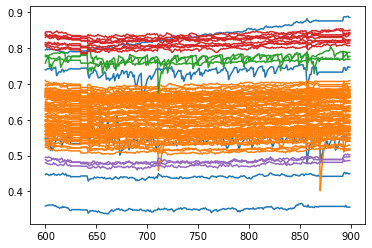

[[34, 77, 91, 92, 96], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 63, 65, 66, 68, 69, 71, 72, 74, 75, 78, 80, 81, 83, 84, 86, 87, 89, 90], [13, 67, 79], [54, 59, 64, 70, 73, 76, 82, 85, 88], [93, 94, 95]]
CLUSTER CHANGE :  [34, 77]
ERROR LIST :  []
WARN_LIST :  [34, 77]


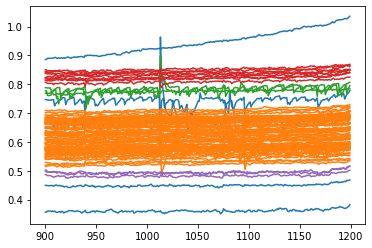

[[10, 77, 91, 92, 96], [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 63, 65, 66, 68, 69, 71, 72, 74, 75, 78, 80, 81, 83, 84, 86, 87, 89, 90], [13, 67, 79], [54, 59, 64, 70, 73, 76, 82, 85, 88], [93, 94, 95]]
CLUSTER CHANGE :  [10, 34]
ERROR LIST :  [10, 77]
WARN_LIST :  [34]


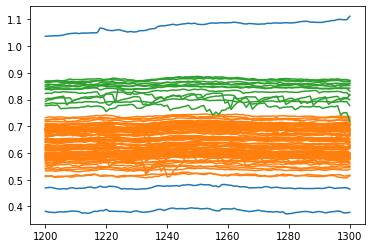

[[77, 92, 96], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 63, 65, 66, 68, 69, 71, 72, 74, 75, 78, 80, 81, 83, 84, 86, 87, 89, 90, 93, 94, 95], [13, 54, 59, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91]]
CLUSTER CHANGE :  [10, 54, 59, 64, 70, 73, 76, 82, 85, 88, 91, 93, 94, 95]
ERROR LIST :  [10, 77]
WARN_LIST :  [34]


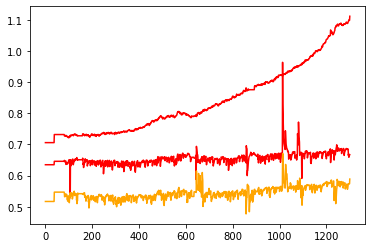

In [14]:
div_cnt = int(len(resist.loc[0,:]) / div_len)

for i in range(div_cnt+1):
    if i == div_cnt:
        feature = resist.iloc[:,div_len*i:]
    else :
        feature = resist.iloc[:, div_len*i:div_len*(i+1)]

    models = DBSCAN(eps=eps_set,min_samples=min_samples_set)
    predicts = pd.DataFrame(models.fit_predict(feature))
    predicts.columns=['predict']

    r = pd.concat([feature,predicts],axis=1)

    min_pred = r['predict'].min()
    max_pred = r['predict'].max()

    pred_len = max_pred - min_pred +1

    stdf = [[] for i in range(pred_len)]
    cell_list = [[] for i in range(pred_len)]
    if i == 0 :
        cell_pred_list = [[] for i in range(len(r))]
        error_list = []
        warn_list = []
    change_true = []
    

    for j in range(len(r)):
        pred_cnt = int(r.loc[j,['predict']])
        stdf[pred_cnt-min_pred].append(r.iloc[j,:-1])
        cell_list[pred_cnt-min_pred].append(j+1)
        cell_pred_list[j].append(pred_cnt)
    
    if i >= 1:
        for ch_ck in range(len(r)):
            if not cell_pred_list[ch_ck][i-1] == cell_pred_list[ch_ck][i]:
                change_true.append(ch_ck+1)     
    
    stdf = pd.DataFrame(stdf)
    
    for k in range(pred_len):
        for l in range(len(stdf.loc[k])-1):
            if stdf.iloc[k,l] is not None:
                if k<=6:
                    plt.plot(stdf.iloc[k,l], color=color_list[k])
                else:
                    plt.plot(stdf.iloc[k,l])
    plt.show()
    print(cell_list)
    print('CLUSTER CHANGE : ',change_true)
    
    ch_tr_len = len(change_true)
    
    if ch_tr_len >= 1:
        for ch_tr_for in range(ch_tr_len):
            #print(ch_tr_len)
            #print(change_true[ch_tr_for])
            cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_fault[change_true[ch_tr_for]-1])
            if cell_chk == True :
                error_list.append(change_true[ch_tr_for])
            else :
                cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_warn[change_true[ch_tr_for]-1])
                if cell_chk == True :
                    warn_list.append(change_true[ch_tr_for])
    
    redup_rm = []
    
    for err_ck in range(len(warn_list)):
        ch_fault = np.any( feature.loc[warn_list[err_ck]-1, :] >= MAD_list_fault[warn_list[err_ck]-1] )
        if ch_fault == True :
            redup_rm.append(warn_list[err_ck])

    if not redup_rm == []:
        for redup in range(len(redup_rm)):
            error_list.append(redup_rm[redup])
            warn_list.remove(redup_rm[redup])
        error_list = dedup(error_list)
        warn_list = dedup(warn_list)
    print('ERROR LIST : ', error_list)
    print('WARN_LIST : ', warn_list)

trans_list = resist.transpose()
list1 = np.ones(len(error_list))
plt_error_list = [-list1[pl] + error_list[pl] for pl in range(len(list1))]
list1 = np.ones(len(warn_list))
plt_warn_list = [-list1[pl] + warn_list[pl] for pl in range(len(list1))]
if not plt_error_list == []:
    plt.plot(trans_list.loc[:, plt_error_list], color='red')
if not plt_warn_list == []:
    plt.plot(trans_list.loc[:, plt_warn_list], color='orange')
plt.show()

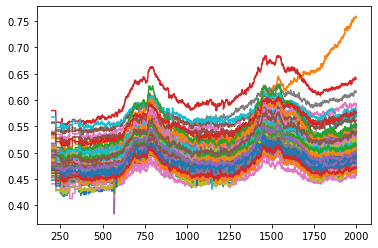

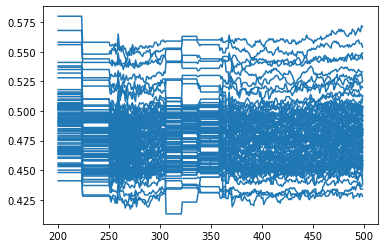

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  []
ERROR LIST :  []
WARN_LIST :  []


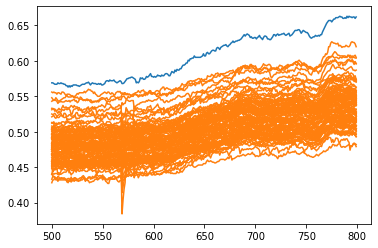

[[24], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  [24]
ERROR LIST :  []
WARN_LIST :  []


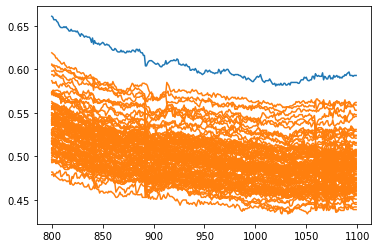

[[24], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  []
ERROR LIST :  []
WARN_LIST :  []


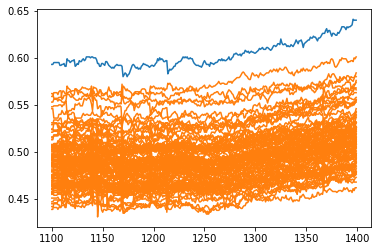

[[24], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  []
ERROR LIST :  []
WARN_LIST :  []


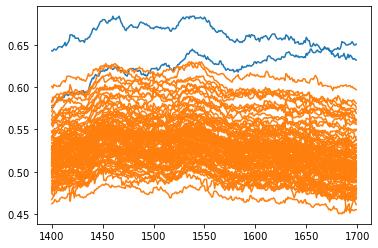

[[22, 24], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  [22]
ERROR LIST :  []
WARN_LIST :  [22]


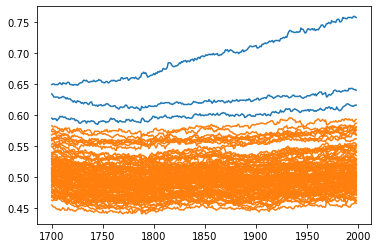

[[22, 24, 28], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  [28]
ERROR LIST :  [22]
WARN_LIST :  []


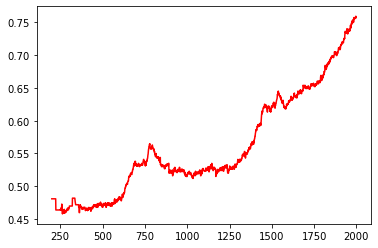

In [15]:
ds = pd.read_csv('data/AI검증용 DB_20210831_9030.csv', encoding='utf8')

len_ds = len(ds)

ds = ds.transpose()

ds = ds.drop(['seqStamp'], axis=0)

column_list = []
for i in range(len(ds)):
    if (i%3)==0:
        column_list.append(i)
        
resist = ds.iloc[column_list]

resist = resist.iloc[:,200:]

column = np.arange(len(resist))
resist.index = column

resist

plt.plot(resist.transpose())
plt.show()

MAD_list_warn = []
MAD_list_fault = []
for i in range(len(resist)):
    median = np.median(resist.loc[i,:])
    MAD_list_warn.append(warn_offset*median)
    MAD_list_fault.append(fault_offset*median)
    
div_len = 300
div_cnt = int(len(resist.loc[0,:]) / div_len)


for i in range(div_cnt+1):
    if i == div_cnt:
        feature = resist.iloc[:,div_len*i:]
    else :
        feature = resist.iloc[:, div_len*i:div_len*(i+1)]

    models = DBSCAN(eps=eps_set,min_samples=min_samples_set)
    predicts = pd.DataFrame(models.fit_predict(feature))
    predicts.columns=['predict']

    r = pd.concat([feature,predicts],axis=1)

    min_pred = r['predict'].min()
    max_pred = r['predict'].max()

    pred_len = max_pred - min_pred +1

    stdf = [[] for i in range(pred_len)]
    cell_list = [[] for i in range(pred_len)]
    if i == 0 :
        cell_pred_list = [[] for i in range(len(r))]
        error_list = []
        warn_list = []
    change_true = []
    

    for j in range(len(r)):
        pred_cnt = int(r.loc[j,['predict']])
        stdf[pred_cnt-min_pred].append(r.iloc[j,:-1])
        cell_list[pred_cnt-min_pred].append(j+1)
        cell_pred_list[j].append(pred_cnt)
    
    if i >= 1:
        for ch_ck in range(len(r)):
            if not cell_pred_list[ch_ck][i-1] == cell_pred_list[ch_ck][i]:
                change_true.append(ch_ck+1)     
    
    stdf = pd.DataFrame(stdf)


    for k in range(pred_len):
        for l in range(len(stdf.loc[k])-1):
            if stdf.iloc[k,l] is not None:
                plt.plot(stdf.iloc[k,l], color=color_list[k])
    plt.show()
    print(cell_list)
    print('CLUSTER CHANGE : ',change_true)
    
    ch_tr_len = len(change_true)
    
    if ch_tr_len >= 1:
        for ch_tr_for in range(ch_tr_len):
            #print(ch_tr_len)
            #print(change_true[ch_tr_for])
            cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_fault[change_true[ch_tr_for]-1])
            if cell_chk == True :
                error_list.append(change_true[ch_tr_for])
            else :
                cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_warn[change_true[ch_tr_for]-1])
                if cell_chk == True :
                    warn_list.append(change_true[ch_tr_for])
                    
    redup_rm = []
    
    for err_ck in range(len(warn_list)):
        ch_fault = np.any( feature.loc[warn_list[err_ck]-1, :] >= MAD_list_fault[warn_list[err_ck]-1] )
        if ch_fault == True :
            redup_rm.append(warn_list[err_ck])

    if not redup_rm == []:
        for redup in range(len(redup_rm)):
            error_list.append(redup_rm[redup])
            warn_list.remove(redup_rm[redup])
        error_list = dedup(error_list)
        warn_list = dedup(warn_list)
    print('ERROR LIST : ', error_list)
    print('WARN_LIST : ', warn_list)


trans_list = resist.transpose()
list1 = np.ones(len(error_list))
plt_error_list = [-list1[pl] + error_list[pl] for pl in range(len(list1))]
list1 = np.ones(len(warn_list))
plt_warn_list = [-list1[pl] + warn_list[pl] for pl in range(len(list1))]
if not plt_error_list == []:
    plt.plot(trans_list.loc[:, plt_error_list], color='red')
if not plt_warn_list == []:
    plt.plot(trans_list.loc[:, plt_warn_list], color='orange')
plt.show()

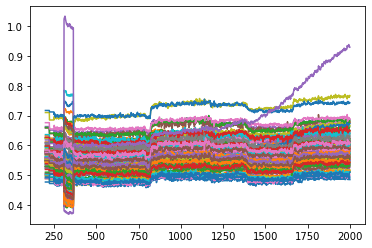

pred len :  4


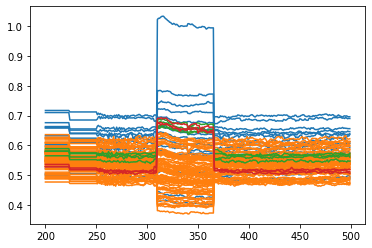

[[4, 5, 10, 11, 12, 15, 22, 23, 29, 36, 45, 53, 57, 71, 78, 84], [1, 2, 3, 6, 7, 8, 9, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 55, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 70, 72, 73, 74, 75, 77, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], [13, 52, 69, 76], [54, 56, 60]]
CLUSTER CHANGE :  []
ERROR LIST :  []
WARN_LIST :  []
pred len :  2


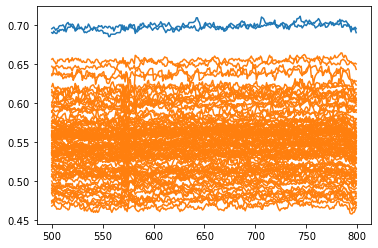

[[29, 71], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  [4, 5, 10, 11, 12, 13, 15, 22, 23, 36, 45, 52, 53, 54, 56, 57, 60, 69, 76, 78, 84]
ERROR LIST :  []
WARN_LIST :  []
pred len :  3


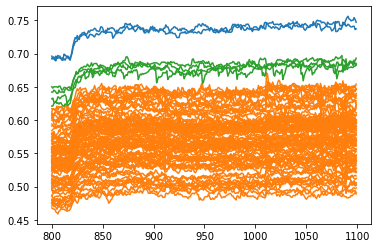

[[29, 71], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], [15, 36, 53, 57]]
CLUSTER CHANGE :  [15, 36, 53, 57]
ERROR LIST :  []
WARN_LIST :  []
pred len :  3


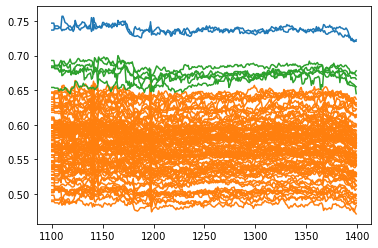

[[29, 71], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], [15, 36, 53, 57, 85]]
CLUSTER CHANGE :  [85]
ERROR LIST :  []
WARN_LIST :  []
pred len :  2


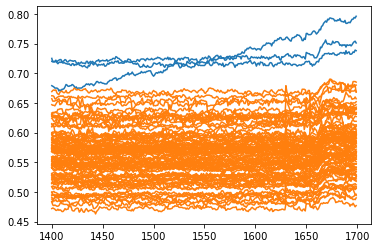

[[29, 71, 85], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  [15, 36, 53, 57, 85]
ERROR LIST :  []
WARN_LIST :  [85]
pred len :  2


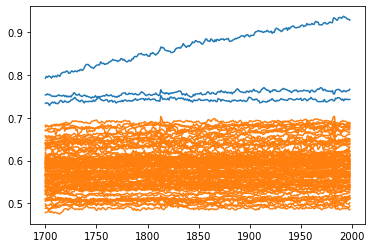

[[29, 71, 85], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  []
ERROR LIST :  [85]
WARN_LIST :  []


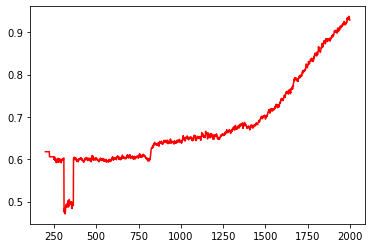

In [16]:
ds = pd.read_csv('data/AI검증용 DB_20210831_9056.csv', encoding='utf8')

len_ds = len(ds)

ds = ds.transpose()

ds = ds.drop(['seqStamp'], axis=0)

column_list = []
for i in range(len(ds)):
    if (i%3)==0:
        column_list.append(i)
        
resist = ds.iloc[column_list]

resist = resist.iloc[:,200:]

column = np.arange(len(resist))
resist.index = column

resist

plt.plot(resist.transpose())
plt.show()

MAD_list_warn = []
MAD_list_fault = []
for i in range(len(resist)):
    median = np.median(resist.loc[i,:])
    MAD_list_warn.append(warn_offset*median)
    MAD_list_fault.append(fault_offset*median)
    
div_len = 300
div_cnt = int(len(resist.loc[0,:]) / div_len)


for i in range(div_cnt+1):
    if i == div_cnt:
        feature = resist.iloc[:,div_len*i:]
    else :
        feature = resist.iloc[:, div_len*i:div_len*(i+1)]

    models = DBSCAN(eps=eps_set,min_samples=min_samples_set)
    predicts = pd.DataFrame(models.fit_predict(feature))
    predicts.columns=['predict']

    r = pd.concat([feature,predicts],axis=1)

    min_pred = r['predict'].min()
    max_pred = r['predict'].max()

    pred_len = max_pred - min_pred +1
    print('pred len : ', pred_len)

    stdf = [[] for i in range(pred_len)]
    cell_list = [[] for i in range(pred_len)]
    if i == 0 :
        cell_pred_list = [[] for i in range(len(r))]
        error_list = []
        warn_list = []
    change_true = []
    

    for j in range(len(r)):
        pred_cnt = int(r.loc[j,['predict']])
        stdf[pred_cnt-min_pred].append(r.iloc[j,:-1])
        cell_list[pred_cnt-min_pred].append(j+1)
        cell_pred_list[j].append(pred_cnt)
    
    if i >= 1:
        for ch_ck in range(len(r)):
            if not cell_pred_list[ch_ck][i-1] == cell_pred_list[ch_ck][i]:
                change_true.append(ch_ck+1)     
    
    stdf = pd.DataFrame(stdf)


    for k in range(pred_len):
        for l in range(len(stdf.loc[k])-1):
            if stdf.iloc[k,l] is not None:
                plt.plot(stdf.iloc[k,l], color=color_list[k])
    plt.show()
    print(cell_list)
    print('CLUSTER CHANGE : ',change_true)
    
    ch_tr_len = len(change_true)
    
    if ch_tr_len >= 1:
        for ch_tr_for in range(ch_tr_len):
            #print(ch_tr_len)
            #print(change_true[ch_tr_for])
            cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_fault[change_true[ch_tr_for]-1])
            if cell_chk == True :
                error_list.append(change_true[ch_tr_for])
            else :
                cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_warn[change_true[ch_tr_for]-1])
                if cell_chk == True :
                    warn_list.append(change_true[ch_tr_for])
                    
    redup_rm = []
    
    for err_ck in range(len(warn_list)):
        ch_fault = np.any( feature.loc[warn_list[err_ck]-1, :] >= MAD_list_fault[warn_list[err_ck]-1] )
        if ch_fault == True :
            redup_rm.append(warn_list[err_ck])

    if not redup_rm == []:
        for redup in range(len(redup_rm)):
            error_list.append(redup_rm[redup])
            warn_list.remove(redup_rm[redup])
        error_list = dedup(error_list)
        warn_list = dedup(warn_list)
    print('ERROR LIST : ', error_list)
    print('WARN_LIST : ', warn_list)
    

trans_list = resist.transpose()
list1 = np.ones(len(error_list))
plt_error_list = [-list1[pl] + error_list[pl] for pl in range(len(list1))]
list1 = np.ones(len(warn_list))
plt_warn_list = [-list1[pl] + warn_list[pl] for pl in range(len(list1))]
if not plt_error_list == []:
    plt.plot(trans_list.loc[:, plt_error_list], color='red')
if not plt_warn_list == []:
    plt.plot(trans_list.loc[:, plt_warn_list], color='orange')
plt.show()

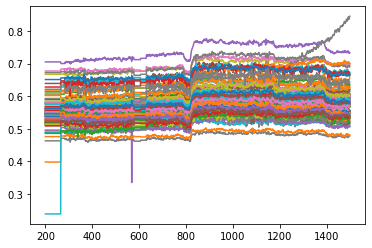

pred len :  2


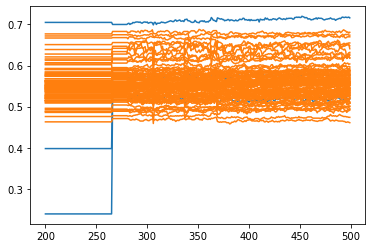

[[15, 42, 90], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  []
ERROR LIST :  []
WARN_LIST :  []
pred len :  3


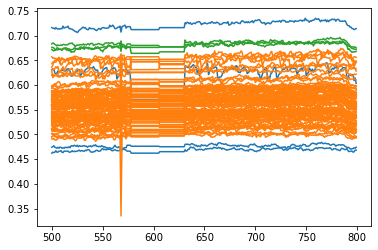

[[15, 68, 78, 82], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], [29, 57, 58]]
CLUSTER CHANGE :  [29, 42, 57, 58, 68, 78, 82, 90]
ERROR LIST :  []
WARN_LIST :  []
pred len :  3


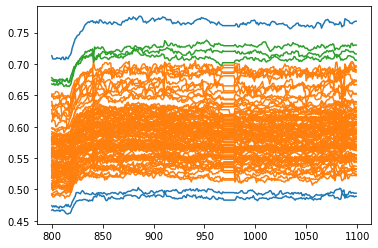

[[15, 68, 82], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], [29, 57, 58]]
CLUSTER CHANGE :  [78]
ERROR LIST :  []
WARN_LIST :  []
pred len :  3


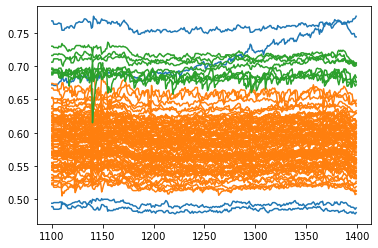

[[15, 48, 68, 82], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54, 55, 56, 59, 60, 61, 63, 65, 66, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], [29, 36, 50, 57, 58, 62, 64, 71]]
CLUSTER CHANGE :  [36, 48, 50, 62, 64, 71]
ERROR LIST :  []
WARN_LIST :  [48]
pred len :  2


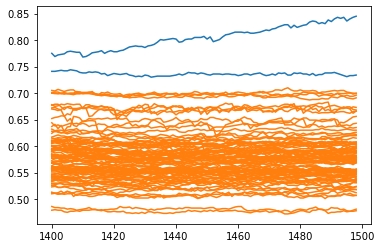

[[15, 48], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  [29, 36, 50, 57, 58, 62, 64, 68, 71, 82]
ERROR LIST :  [48]
WARN_LIST :  []


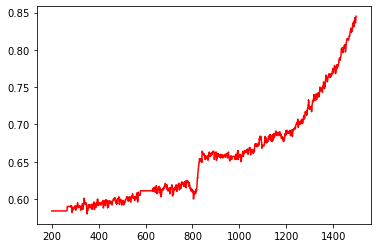

In [20]:
ds = pd.read_csv('data/AI검증용 DB_20210831_9060.csv', encoding='utf8')

len_ds = len(ds)

ds = ds.transpose()

ds = ds.drop(['seqStamp'], axis=0)

column_list = []
for i in range(len(ds)):
    if (i%3)==0:
        column_list.append(i)
        
resist = ds.iloc[column_list]

resist = resist.iloc[:,200:]

column = np.arange(len(resist))
resist.index = column

resist

plt.plot(resist.transpose())
plt.show()

MAD_list_warn = []
MAD_list_fault = []
for i in range(len(resist)):
    median = np.median(resist.loc[i,:])
    MAD_list_warn.append(warn_offset*median)
    MAD_list_fault.append(fault_offset*median)
    
div_len = 300
div_cnt = int(len(resist.loc[0,:]) / div_len)


for i in range(div_cnt+1):
    if i == div_cnt:
        feature = resist.iloc[:,div_len*i:]
    else :
        feature = resist.iloc[:, div_len*i:div_len*(i+1)]

    models = DBSCAN(eps=eps_set,min_samples=min_samples_set)
    predicts = pd.DataFrame(models.fit_predict(feature))
    predicts.columns=['predict']

    r = pd.concat([feature,predicts],axis=1)

    min_pred = r['predict'].min()
    max_pred = r['predict'].max()

    pred_len = max_pred - min_pred +1
    print('pred len : ', pred_len)

    stdf = [[] for i in range(pred_len)]
    cell_list = [[] for i in range(pred_len)]
    if i == 0 :
        cell_pred_list = [[] for i in range(len(r))]
        error_list = []
        warn_list = []
    change_true = []
    

    for j in range(len(r)):
        pred_cnt = int(r.loc[j,['predict']])
        stdf[pred_cnt-min_pred].append(r.iloc[j,:-1])
        cell_list[pred_cnt-min_pred].append(j+1)
        cell_pred_list[j].append(pred_cnt)
    
    if i >= 1:
        for ch_ck in range(len(r)):
            if not cell_pred_list[ch_ck][i-1] == cell_pred_list[ch_ck][i]:
                change_true.append(ch_ck+1)     
    
    stdf = pd.DataFrame(stdf)


    for k in range(pred_len):
        for l in range(len(stdf.loc[k])-1):
            if stdf.iloc[k,l] is not None:
                plt.plot(stdf.iloc[k,l], color=color_list[k])
    plt.show()
    print(cell_list)
    print('CLUSTER CHANGE : ',change_true)
    
    ch_tr_len = len(change_true)
    
    if ch_tr_len >= 1:
        for ch_tr_for in range(ch_tr_len):
            #print(ch_tr_len)
            #print(change_true[ch_tr_for])
            cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_fault[change_true[ch_tr_for]-1])
            if cell_chk == True :
                error_list.append(change_true[ch_tr_for])
            else :
                cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_warn[change_true[ch_tr_for]-1])
                if cell_chk == True :
                    warn_list.append(change_true[ch_tr_for])

    redup_rm = []
    
    for err_ck in range(len(warn_list)):
        ch_fault = np.any( feature.loc[warn_list[err_ck]-1, :] >= MAD_list_fault[warn_list[err_ck]-1] )
        if ch_fault == True :
            redup_rm.append(warn_list[err_ck])

    if not redup_rm == []:
        for redup in range(len(redup_rm)):
            error_list.append(redup_rm[redup])
            warn_list.remove(redup_rm[redup])
        error_list = dedup(error_list)
        warn_list = dedup(warn_list)
    print('ERROR LIST : ', error_list)
    print('WARN_LIST : ', warn_list)
    

trans_list = resist.transpose()
list1 = np.ones(len(error_list))
plt_error_list = [-list1[pl] + error_list[pl] for pl in range(len(list1))]
list1 = np.ones(len(warn_list))
plt_warn_list = [-list1[pl] + warn_list[pl] for pl in range(len(list1))]
if not plt_error_list == []:
    plt.plot(trans_list.loc[:, plt_error_list], color='red')
if not plt_warn_list == []:
    plt.plot(trans_list.loc[:, plt_warn_list], color='orange')
plt.show()

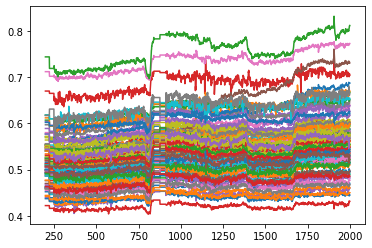

pred len :  2


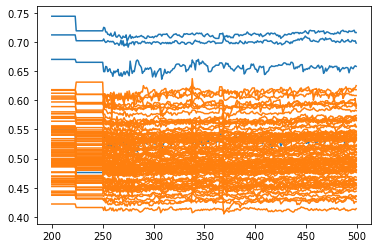

[[4, 57, 63, 64], [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  []
ERROR LIST :  []
WARN_LIST :  []
pred len :  2


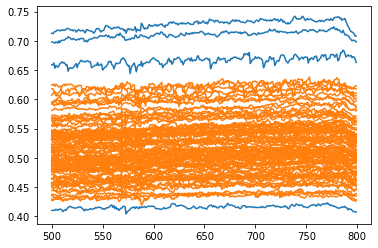

[[4, 57, 63, 74], [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  [64, 74]
ERROR LIST :  []
WARN_LIST :  []
pred len :  2


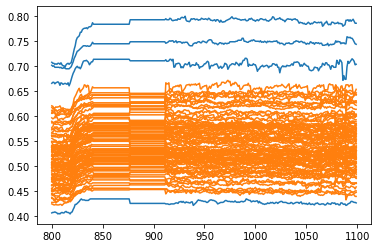

[[4, 57, 63, 74], [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  []
ERROR LIST :  []
WARN_LIST :  []
pred len :  2


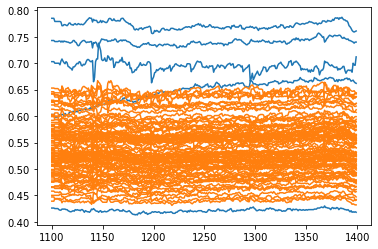

[[4, 26, 57, 63, 74], [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  [26]
ERROR LIST :  []
WARN_LIST :  [26]
pred len :  2


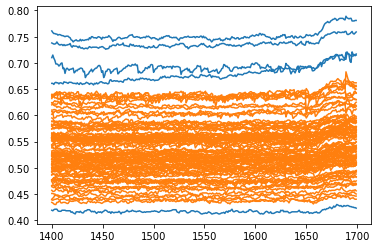

[[4, 26, 57, 63, 74], [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  []
ERROR LIST :  []
WARN_LIST :  [26]
pred len :  2


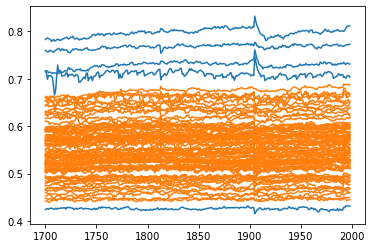

[[4, 26, 57, 63, 74], [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  []
ERROR LIST :  [26]
WARN_LIST :  []


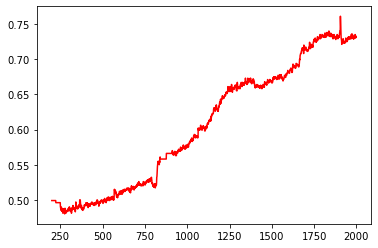

In [18]:
ds = pd.read_csv('data/AI검증용 DB_20210831_9061.csv', encoding='utf8')

len_ds = len(ds)

ds = ds.transpose()

ds = ds.drop(['seqStamp'], axis=0)

column_list = []
for i in range(len(ds)):
    if (i%3)==0:
        column_list.append(i)
        
resist = ds.iloc[column_list]

resist = resist.iloc[:,200:]

column = np.arange(len(resist))
resist.index = column

resist

plt.plot(resist.transpose())
plt.show()

MAD_list_warn = []
MAD_list_fault = []
for i in range(len(resist)):
    median = np.median(resist.loc[i,:])
    MAD_list_warn.append(warn_offset*median)
    MAD_list_fault.append(fault_offset*median)
    
div_len = 300
div_cnt = int(len(resist.loc[0,:]) / div_len)


for i in range(div_cnt+1):
    if i == div_cnt:
        feature = resist.iloc[:,div_len*i:]
    else :
        feature = resist.iloc[:, div_len*i:div_len*(i+1)]

    models = DBSCAN(eps=eps_set,min_samples=min_samples_set)
    predicts = pd.DataFrame(models.fit_predict(feature))
    predicts.columns=['predict']

    r = pd.concat([feature,predicts],axis=1)

    min_pred = r['predict'].min()
    max_pred = r['predict'].max()

    pred_len = max_pred - min_pred +1
    print('pred len : ', pred_len)

    stdf = [[] for i in range(pred_len)]
    cell_list = [[] for i in range(pred_len)]
    if i == 0 :
        cell_pred_list = [[] for i in range(len(r))]
        error_list = []
        warn_list = []
    change_true = []
    

    for j in range(len(r)):
        pred_cnt = int(r.loc[j,['predict']])
        stdf[pred_cnt-min_pred].append(r.iloc[j,:-1])
        cell_list[pred_cnt-min_pred].append(j+1)
        cell_pred_list[j].append(pred_cnt)
    
    if i >= 1:
        for ch_ck in range(len(r)):
            if not cell_pred_list[ch_ck][i-1] == cell_pred_list[ch_ck][i]:
                change_true.append(ch_ck+1)     
    
    stdf = pd.DataFrame(stdf)


    for k in range(pred_len):
        for l in range(len(stdf.loc[k])-1):
            if stdf.iloc[k,l] is not None:
                plt.plot(stdf.iloc[k,l], color=color_list[k])
    plt.show()
    print(cell_list)
    print('CLUSTER CHANGE : ',change_true)
    
    ch_tr_len = len(change_true)
    
    if ch_tr_len >= 1:
        for ch_tr_for in range(ch_tr_len):
            #print(ch_tr_len)
            #print(change_true[ch_tr_for])
            cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_fault[change_true[ch_tr_for]-1])
            if cell_chk == True :
                error_list.append(change_true[ch_tr_for])
            else :
                cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_warn[change_true[ch_tr_for]-1])
                if cell_chk == True :
                    warn_list.append(change_true[ch_tr_for])

    redup_rm = []
    
    for err_ck in range(len(warn_list)):
        ch_fault = np.any( feature.loc[warn_list[err_ck]-1, :] >= MAD_list_fault[warn_list[err_ck]-1] )
        if ch_fault == True :
            redup_rm.append(warn_list[err_ck])

    if not redup_rm == []:
        for redup in range(len(redup_rm)):
            error_list.append(redup_rm[redup])
            warn_list.remove(redup_rm[redup])
        error_list = dedup(error_list)
        warn_list = dedup(warn_list)
    print('ERROR LIST : ', error_list)
    print('WARN_LIST : ', warn_list)
    

trans_list = resist.transpose()
list1 = np.ones(len(error_list))
plt_error_list = [-list1[pl] + error_list[pl] for pl in range(len(list1))]
list1 = np.ones(len(warn_list))
plt_warn_list = [-list1[pl] + warn_list[pl] for pl in range(len(list1))]
if not plt_error_list == []:
    plt.plot(trans_list.loc[:, plt_error_list], color='red')
if not plt_warn_list == []:
    plt.plot(trans_list.loc[:, plt_warn_list], color='orange')
plt.show()

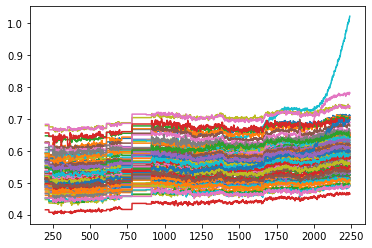

pred len :  2


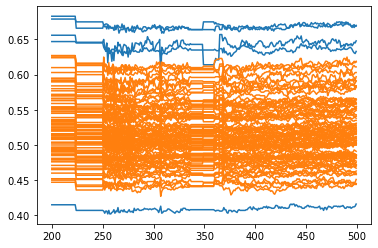

[[29, 43, 54, 57, 64], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  []
ERROR LIST :  []
WARN_LIST :  []
pred len :  2


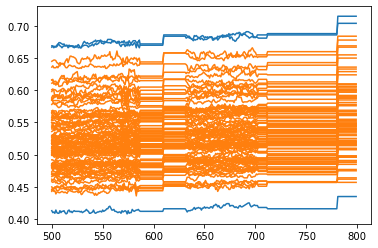

[[29, 54, 57], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  [43, 64]
ERROR LIST :  []
WARN_LIST :  []
pred len :  3


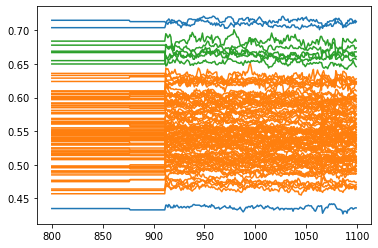

[[29, 54, 57], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 60, 61, 62, 63, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], [21, 22, 43, 64, 66, 77]]
CLUSTER CHANGE :  [21, 22, 43, 64, 66, 77]
ERROR LIST :  []
WARN_LIST :  []
pred len :  2


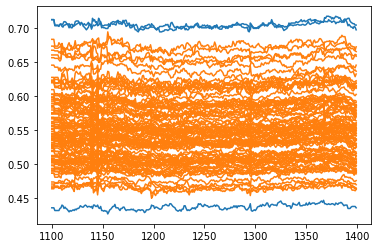

[[29, 54, 57], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  [21, 22, 43, 64, 66, 77]
ERROR LIST :  []
WARN_LIST :  []
pred len :  2


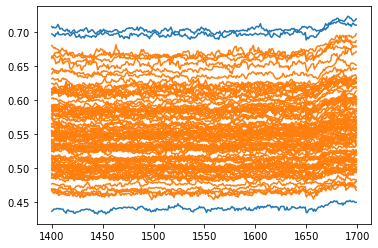

[[29, 54, 57], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  []
ERROR LIST :  []
WARN_LIST :  []
pred len :  3


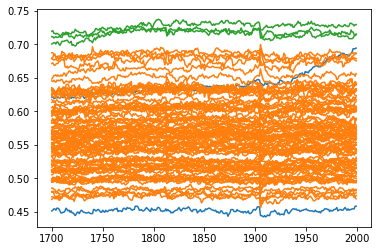

[[17, 54], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], [20, 29, 57]]
CLUSTER CHANGE :  [17, 20, 29, 57]
ERROR LIST :  []
WARN_LIST :  [17, 20]
pred len :  2


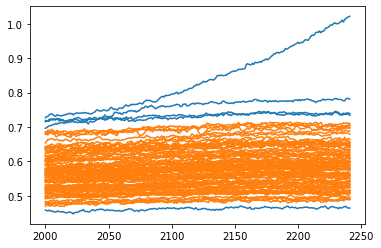

[[17, 20, 29, 54, 57], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]]
CLUSTER CHANGE :  [20, 29, 57]
ERROR LIST :  [20, 17]
WARN_LIST :  []


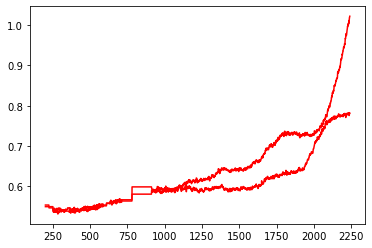

In [19]:
ds = pd.read_csv('data/AI검증용 DB_20210831_9062.csv', encoding='utf8')

len_ds = len(ds)

ds = ds.transpose()

ds = ds.drop(['seqStamp'], axis=0)

column_list = []
for i in range(len(ds)):
    if (i%3)==0:
        column_list.append(i)
        
resist = ds.iloc[column_list]

resist = resist.iloc[:,200:]

column = np.arange(len(resist))
resist.index = column

resist

plt.plot(resist.transpose())
plt.show()

MAD_list_warn = []
MAD_list_fault = []
for i in range(len(resist)):
    median = np.median(resist.loc[i,:])
    MAD_list_warn.append(warn_offset*median)
    MAD_list_fault.append(fault_offset*median)
    
div_len = 300
div_cnt = int(len(resist.loc[0,:]) / div_len)


for i in range(div_cnt+1):
    if i == div_cnt:
        feature = resist.iloc[:,div_len*i:]
    else :
        feature = resist.iloc[:, div_len*i:div_len*(i+1)]

    models = DBSCAN(eps=eps_set,min_samples=min_samples_set)
    predicts = pd.DataFrame(models.fit_predict(feature))
    predicts.columns=['predict']

    r = pd.concat([feature,predicts],axis=1)

    min_pred = r['predict'].min()
    max_pred = r['predict'].max()

    pred_len = max_pred - min_pred +1
    print('pred len : ', pred_len)

    stdf = [[] for i in range(pred_len)]
    cell_list = [[] for i in range(pred_len)]
    if i == 0 :
        cell_pred_list = [[] for i in range(len(r))]
        error_list = []
        warn_list = []
    change_true = []
    

    for j in range(len(r)):
        pred_cnt = int(r.loc[j,['predict']])
        stdf[pred_cnt-min_pred].append(r.iloc[j,:-1])
        cell_list[pred_cnt-min_pred].append(j+1)
        cell_pred_list[j].append(pred_cnt)
    
    if i >= 1:
        for ch_ck in range(len(r)):
            if not cell_pred_list[ch_ck][i-1] == cell_pred_list[ch_ck][i]:
                change_true.append(ch_ck+1)     
    
    stdf = pd.DataFrame(stdf)


    for k in range(pred_len):
        for l in range(len(stdf.loc[k])-1):
            if stdf.iloc[k,l] is not None:
                plt.plot(stdf.iloc[k,l], color=color_list[k])
    plt.show()
    print(cell_list)
    print('CLUSTER CHANGE : ',change_true)
    
    ch_tr_len = len(change_true)
    
    if ch_tr_len >= 1:
        for ch_tr_for in range(ch_tr_len):
            #print(ch_tr_len)
            #print(change_true[ch_tr_for])
            cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_fault[change_true[ch_tr_for]-1])
            if cell_chk == True :
                error_list.append(change_true[ch_tr_for])
            else :
                cell_chk = np.any(feature.loc[change_true[ch_tr_for]-1,:] >= MAD_list_warn[change_true[ch_tr_for]-1])
                if cell_chk == True :
                    warn_list.append(change_true[ch_tr_for])

    redup_rm = []
    
    for err_ck in range(len(warn_list)):
        ch_fault = np.any( feature.loc[warn_list[err_ck]-1, :] >= MAD_list_fault[warn_list[err_ck]-1] )
        if ch_fault == True :
            redup_rm.append(warn_list[err_ck])
    
    if not redup_rm == []:
        for redup in range(len(redup_rm)):
            error_list.append(redup_rm[redup])
            warn_list.remove(redup_rm[redup])
        error_list = dedup(error_list)
        warn_list = dedup(warn_list)
    print('ERROR LIST : ', error_list)
    print('WARN_LIST : ', warn_list)
    

trans_list = resist.transpose()
list1 = np.ones(len(error_list))
plt_error_list = [-list1[pl] + error_list[pl] for pl in range(len(list1))]
list1 = np.ones(len(warn_list))
plt_warn_list = [-list1[pl] + warn_list[pl] for pl in range(len(list1))]
if not plt_error_list == []:
    plt.plot(trans_list.loc[:, plt_error_list], color='red')
if not plt_warn_list == []:
    plt.plot(trans_list.loc[:, plt_warn_list], color='orange')
plt.show()